***Exploratory Data Analysis, Visualization, and Modeling of California Department of Children & Family Services Data***

Children entangled with foster care are some of the most vulnerable & marginalized children in our society. While trying to both shed light on a relevant issue & preserve the dignity of all parties involve, the goal of this analysis is to provide insight into one of the intractable societal problems.

Below you will find:
#1. EDA with visual analysis of the data 
#2. An answer to the following question: 

#How much more likely is a [Hispanic, boy from Torrance] than a [Black, girl from Pomona] to end up in the foster care system?
#4. Which counties are under the most pressure?
#5. Which groups are most at-risk of falling into the system?

In [194]:
# Load necessary libraries

# Exploratory
import pandas_profiling

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Maps
import folium
import json
from folium import plugins

# Data Manipulation
import numpy as np
import pandas as pd

# Filtering
import re

#Used color pallet from 'https://teamcolorcodes.com/manchester-city-fc-colors/'

missing_values = ['N/a', 'na', np.nan]
df = pd.read_csv("/Users/jasonbrooks/GA/python_practice/DCFS_Caseload_Statistics.csv"
                 ,na_values = missing_values)
df_zip = pd.read_csv("/Users/jasonbrooks/GA/python_practice/FosterCare_Zip.csv")
df_zip1 = pd.read_csv("/Users/jasonbrooks/GA/python_practice/FosterCare_Zip2.csv")
df_zip2 = pd.read_csv("/Users/jasonbrooks/GA/python_practice/FosterCare_Zip3.csv")

In [195]:
df.shape

(91380, 15)

***Exploratory Data Analysis***

In [196]:
pfr = pandas_profiling.ProfileReport(df)
pfr.to_notebook_iframe() 

In [197]:
df.head()

CURRENT_ZIP  SEPARATE_FAMILY_ZIP         DCFS_OFFICE FACILITY_TYPE  GENDER  \
0        90001              90001.0     Wateridge North       In Home    Male   
1        90001              90001.0    Vermont Corridor       In Home    Male   
2        90001              90001.0    Vermont Corridor       In Home    Male   
3        90001              90001.0  Deaf Services Unit       In Home    Male   
4        90001              90001.0    Vermont Corridor       In Home  Female   

         AGE_RANGE ETHNICITY LANGUAGE PLACEMENT_IND    REPORT_YEAR  \
0      3 - 4 Years     Other  English       In Home  12/31/17 0:00   
1      3 - 4 Years  Hispanic  Spanish       In Home  12/31/18 0:00   
2  Birth - 2 Years  Hispanic  English       In Home  12/31/18 0:00   
3  Birth - 2 Years  Hispanic  English       In Home  12/31/18 0:00   
4      5 - 9 Years     Black  English       In Home  12/31/18 0:00   

   LENGTH_OF_STAY_MON TAY_IND  COUNT   latitude   longitude  
0                 NaN       N      1  33.972667 -118.249401  
1                 NaN       N      1  33.972667 -118.249401  
2                 NaN       N      1  33.972667 -118.249401  
3                 NaN       N      1  33.972667 -118.249401  
4                 NaN       N      1  33.972667 -118.249401

In [198]:
df.groupby('REPORT_YEAR').count()

CURRENT_ZIP  SEPARATE_FAMILY_ZIP  DCFS_OFFICE  FACILITY_TYPE  \
REPORT_YEAR                                                                   
12/31/16 0:00        30125                30125        30125          30125   
12/31/17 0:00        29722                29722        29722          29722   
12/31/18 0:00        31533                30158        31533          31533   

               GENDER  AGE_RANGE  ETHNICITY  LANGUAGE  PLACEMENT_IND  \
REPORT_YEAR                                                            
12/31/16 0:00   30125      30125      30125     30027          30125   
12/31/17 0:00   29722      29722      29722     29647          29722   
12/31/18 0:00   31533      31533      31533     31438          31533   

               LENGTH_OF_STAY_MON  TAY_IND  COUNT  latitude  longitude  
REPORT_YEAR                                                             
12/31/16 0:00               17478    30125  30125     30125      30125  
12/31/17 0:00               17771    29722  29722     29722      29722  
12/31/18 0:00               18759    31533  31533     31533      31533

In [199]:
df.loc[(df['REPORT_YEAR'] == "12/31/18 0:00")]

CURRENT_ZIP  SEPARATE_FAMILY_ZIP         DCFS_OFFICE  \
1            90001              90001.0    Vermont Corridor   
2            90001              90001.0    Vermont Corridor   
3            90001              90001.0  Deaf Services Unit   
4            90001              90001.0    Vermont Corridor   
5            90001              90001.0    Vermont Corridor   
...            ...                  ...                 ...   
91375        93591              93535.0           Lancaster   
91376        93591              93534.0            Palmdale   
91377        93591              93591.0            Palmdale   
91378        93591              93550.0            Palmdale   
91379        93591              93591.0            Palmdale   

              FACILITY_TYPE  GENDER           AGE_RANGE ETHNICITY LANGUAGE  \
1                   In Home    Male         3 - 4 Years  Hispanic  Spanish   
2                   In Home    Male     Birth - 2 Years  Hispanic  English   
3                   In Home    Male     Birth - 2 Years  Hispanic  English   
4                   In Home  Female         5 - 9 Years     Black  English   
5                   In Home    Male         5 - 9 Years  Hispanic  Spanish   
...                     ...     ...                 ...       ...      ...   
91375  Resource Family Home    Male         3 - 4 Years  Hispanic  English   
91376   Relative/NREFM Home  Female     Birth - 2 Years     Black  English   
91377  Resource Family Home    Male         5 - 9 Years  Hispanic  English   
91378  Resource Family Home    Male         5 - 9 Years  Hispanic  English   
91379  Resource Family Home  Female  18 Years and Older  Hispanic  Spanish   

      PLACEMENT_IND    REPORT_YEAR  LENGTH_OF_STAY_MON TAY_IND  COUNT  \
1           In Home  12/31/18 0:00                 NaN       N      1   
2           In Home  12/31/18 0:00                 NaN       N      1   
3           In Home  12/31/18 0:00                 NaN       N      1   
4           In Home  12/31/18 0:00                 NaN       N      1   
5           In Home  12/31/18 0:00                 NaN       N      1   
...             ...            ...                 ...     ...    ...   
91375   Out of Home  12/31/18 0:00                 7.0       N      1   
91376   Out of Home  12/31/18 0:00                13.0       N      1   
91377   Out of Home  12/31/18 0:00                 8.0       N      1   
91378   Out of Home  12/31/18 0:00                32.0       N      1   
91379   Out of Home  12/31/18 0:00                14.0       Y      1   

        latitude   longitude  
1      33.972667 -118.249401  
2      33.972667 -118.249401  
3      33.972667 -118.249401  
4      33.972667 -118.249401  
5      33.972667 -118.249401  
...          ...         ...  
91375  34.600579 -117.833740  
91376  34.600579 -117.833740  
91377  34.600579 -117.833740  
91378  34.600579 -117.833740  
91379  34.600579 -117.833740  

[31533 rows x 15 columns]

In [200]:
df = df.loc[(df['REPORT_YEAR'] == "12/31/18 0:00")]

In [201]:
df.isna().sum()

CURRENT_ZIP                0
SEPARATE_FAMILY_ZIP     1375
DCFS_OFFICE                0
FACILITY_TYPE              0
GENDER                     0
AGE_RANGE                  0
ETHNICITY                  0
LANGUAGE                  95
PLACEMENT_IND              0
REPORT_YEAR                0
LENGTH_OF_STAY_MON     12774
TAY_IND                    0
COUNT                      0
latitude                   0
longitude                  0
dtype: int64

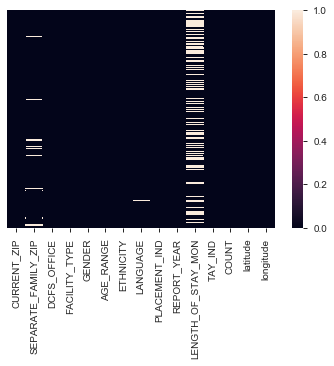

In [202]:
# Visualize missing data
sns.heatmap(df.isnull(),yticklabels=False) #, annot = True)

plt.show()

In [203]:
#Per DCFS website, replace 0 with 90013 Zipcode
df.loc[df['SEPARATE_FAMILY_ZIP'] == 0, 'SEPARATE_FAMILY_ZIP'] = '90013'

# Filled unknown Separate Family Zip with 90013
df['SEPARATE_FAMILY_ZIP'].fillna("90013", inplace = True)

In [204]:
df.isna().sum()

CURRENT_ZIP                0
SEPARATE_FAMILY_ZIP        0
DCFS_OFFICE                0
FACILITY_TYPE              0
GENDER                     0
AGE_RANGE                  0
ETHNICITY                  0
LANGUAGE                  95
PLACEMENT_IND              0
REPORT_YEAR                0
LENGTH_OF_STAY_MON     12774
TAY_IND                    0
COUNT                      0
latitude                   0
longitude                  0
dtype: int64

In [205]:
# Unknown language & NAN values in Length of Stay dropped from DataFrame
df.dropna()

CURRENT_ZIP SEPARATE_FAMILY_ZIP       DCFS_OFFICE  \
698          90001               95833  Vermont Corridor   
699          90001               90003  Vermont Corridor   
700          90001               90001   Wateridge South   
701          90001               91803          Pasadena   
702          90001               90013  Vermont Corridor   
...            ...                 ...               ...   
91375        93591               93535         Lancaster   
91376        93591               93534          Palmdale   
91377        93591               93591          Palmdale   
91378        93591               93550          Palmdale   
91379        93591               93591          Palmdale   

                             FACILITY_TYPE  GENDER           AGE_RANGE  \
698    FFA Certified Resources Family Home  Female       16 - 17 Years   
699                   Resource Family Home  Female     Birth - 2 Years   
700                    Relative/NREFM Home    Male         5 - 9 Years   
701                     FFA Certified Home    Male     Birth - 2 Years   
702    FFA Certified Resources Family Home  Female       10 - 13 Years   
...                                    ...     ...                 ...   
91375                 Resource Family Home    Male         3 - 4 Years   
91376                  Relative/NREFM Home  Female     Birth - 2 Years   
91377                 Resource Family Home    Male         5 - 9 Years   
91378                 Resource Family Home    Male         5 - 9 Years   
91379                 Resource Family Home  Female  18 Years and Older   

      ETHNICITY LANGUAGE PLACEMENT_IND    REPORT_YEAR  LENGTH_OF_STAY_MON  \
698       Black  English   Out of Home  12/31/18 0:00                79.0   
699    Hispanic  English   Out of Home  12/31/18 0:00                 3.0   
700    Hispanic  Spanish   Out of Home  12/31/18 0:00                26.0   
701    Hispanic  English   Out of Home  12/31/18 0:00                 5.0   
702       Black  English   Out of Home  12/31/18 0:00               109.0   
...         ...      ...           ...            ...                 ...   
91375  Hispanic  English   Out of Home  12/31/18 0:00                 7.0   
91376     Black  English   Out of Home  12/31/18 0:00                13.0   
91377  Hispanic  English   Out of Home  12/31/18 0:00                 8.0   
91378  Hispanic  English   Out of Home  12/31/18 0:00                32.0   
91379  Hispanic  Spanish   Out of Home  12/31/18 0:00                14.0   

      TAY_IND  COUNT   latitude   longitude  
698         N      1  33.972667 -118.249401  
699         N      1  33.972667 -118.249401  
700         N      1  33.972667 -118.249401  
701         N      1  33.972667 -118.249401  
702         N      1  33.972667 -118.249401  
...       ...    ...        ...         ...  
91375       N      1  34.600579 -117.833740  
91376       N      1  34.600579 -117.833740  
91377       N      1  34.600579 -117.833740  
91378       N      1  34.600579 -117.833740  
91379       Y      1  34.600579 -117.833740  

[18718 rows x 15 columns]

In [206]:
df = df.dropna()
df.shape

(18718, 15)

In [207]:
df["LANGUAGE"].value_counts()

English                   15494
Spanish                    3145
American Sign Language       15
Mandarin                     11
Korean                        8
Cambodian                     8
Cantonese                     6
Armenian                      6
Other Non-English             5
Vietnamese                    5
Tagalog                       5
Hawaiian                      5
Russian                       2
Arabic                        2
Samoan                        1
Name: LANGUAGE, dtype: int64

In [208]:
df.isna().sum()

CURRENT_ZIP            0
SEPARATE_FAMILY_ZIP    0
DCFS_OFFICE            0
FACILITY_TYPE          0
GENDER                 0
AGE_RANGE              0
ETHNICITY              0
LANGUAGE               0
PLACEMENT_IND          0
REPORT_YEAR            0
LENGTH_OF_STAY_MON     0
TAY_IND                0
COUNT                  0
latitude               0
longitude              0
dtype: int64

In [209]:
#Convert AGE_RANGE from string to integer
def Age_Int(x):
    if x == 'Birth - 2 Years':
        return 1
    if x == '3 - 4 Years':
        return 2
    if x == '5 - 9 Years':
        return 3
    if x == '10 - 13 Years':
        return 4
    if x == '14 - 15 Years':
        return 5
    if x == '16 - 17 Years':
        return 6
    if x == '18 Years and Older':
        return 7
    
df['Age_Int'] = df['AGE_RANGE'].apply(Age_Int)

In [210]:
df.head()

CURRENT_ZIP SEPARATE_FAMILY_ZIP       DCFS_OFFICE  \
698        90001               95833  Vermont Corridor   
699        90001               90003  Vermont Corridor   
700        90001               90001   Wateridge South   
701        90001               91803          Pasadena   
702        90001               90013  Vermont Corridor   

                           FACILITY_TYPE  GENDER        AGE_RANGE ETHNICITY  \
698  FFA Certified Resources Family Home  Female    16 - 17 Years     Black   
699                 Resource Family Home  Female  Birth - 2 Years  Hispanic   
700                  Relative/NREFM Home    Male      5 - 9 Years  Hispanic   
701                   FFA Certified Home    Male  Birth - 2 Years  Hispanic   
702  FFA Certified Resources Family Home  Female    10 - 13 Years     Black   

    LANGUAGE PLACEMENT_IND    REPORT_YEAR  LENGTH_OF_STAY_MON TAY_IND  COUNT  \
698  English   Out of Home  12/31/18 0:00                79.0       N      1   
699  English   Out of Home  12/31/18 0:00                 3.0       N      1   
700  Spanish   Out of Home  12/31/18 0:00                26.0       N      1   
701  English   Out of Home  12/31/18 0:00                 5.0       N      1   
702  English   Out of Home  12/31/18 0:00               109.0       N      1   

      latitude   longitude  Age_Int  
698  33.972667 -118.249401        6  
699  33.972667 -118.249401        1  
700  33.972667 -118.249401        3  
701  33.972667 -118.249401        1  
702  33.972667 -118.249401        4

In [211]:
df.count()

CURRENT_ZIP            18718
SEPARATE_FAMILY_ZIP    18718
DCFS_OFFICE            18718
FACILITY_TYPE          18718
GENDER                 18718
AGE_RANGE              18718
ETHNICITY              18718
LANGUAGE               18718
PLACEMENT_IND          18718
REPORT_YEAR            18718
LENGTH_OF_STAY_MON     18718
TAY_IND                18718
COUNT                  18718
latitude               18718
longitude              18718
Age_Int                18718
dtype: int64

In [212]:
df.dtypes

CURRENT_ZIP              int64
SEPARATE_FAMILY_ZIP     object
DCFS_OFFICE             object
FACILITY_TYPE           object
GENDER                  object
AGE_RANGE               object
ETHNICITY               object
LANGUAGE                object
PLACEMENT_IND           object
REPORT_YEAR             object
LENGTH_OF_STAY_MON     float64
TAY_IND                 object
COUNT                    int64
latitude               float64
longitude              float64
Age_Int                  int64
dtype: object

In [213]:
# Convert strings to date time/intt
# visualize separate zip, current zip, and dcfs zip https://data.lacounty.gov/Children-and-Family/DCFS-Offices-and-Foster-Care-Placement-Homes/xwu5-q4x2
# use a sankey diagram to play with flow
# for 2018 use separated zip code to predict length of stay (there are missing values in length of stay - explain why)
# use a decision tree to predict data
# create a separated to ended up visualization

# Load clean dataset
# df.to_csv('DCFS_Clean.csv', index=False)
# df_cl = pd.read_csv('DCFS_Clean.csv')
# df_cl.head()

In [215]:
# I want to turn this into a histogram
ethn_age = df.groupby(['ETHNICITY','Age_Int']).count()
ethn_age

CURRENT_ZIP  SEPARATE_FAMILY_ZIP  \
ETHNICITY                      Age_Int                                     
American Indian/Alaskan Native 1                 19                   19   
                               2                  4                    4   
                               3                 12                   12   
                               4                  4                    4   
                               5                  4                    4   
                               6                  6                    6   
                               7                  6                    6   
Asian/Pacific Islander         1                 66                   66   
                               2                 25                   25   
                               3                 49                   49   
                               4                 37                   37   
                               5                 19                   19   
                               6                 31                   31   
                               7                 34                   34   
Black                          1                933                  933   
                               2                627                  627   
                               3               1230                 1230   
                               4                788                  788   
                               5                427                  427   
                               6                481                  481   
                               7                650                  650   
Hispanic                       1               2247                 2247   
                               2               1362                 1362   
                               3               2598                 2598   
                               4               1813                 1813   
                               5                874                  874   
                               6                844                  844   
                               7                969                  969   
Other                          1                195                  195   
                               2                 96                   96   
                               3                201                  201   
                               4                141                  141   
                               5                 49                   49   
                               6                 75                   75   
                               7                 98                   98   
White                          1                410                  410   
                               2                192                  192   
                               3                343                  343   
                               4                281                  281   
                               5                160                  160   
                               6                140                  140   
                               7                178                  178   

                                        DCFS_OFFICE  FACILITY_TYPE  GENDER  \
ETHNICITY                      Age_Int                                       
American Indian/Alaskan Native 1                 19             19      19   
                               2                  4              4       4   
                               3                 12             12      12   
                               4                  4              4       4   
                               5                  4              4       4   
                               6                  6              6       6   
                               7                  6              6     


***Data Visualization***

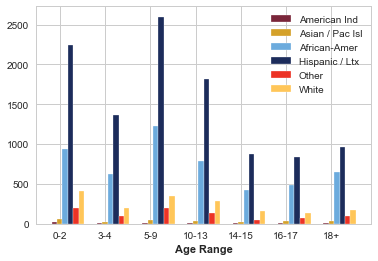

In [242]:
# set width of bar
barWidth = 0.12

# set height of bar
bars1 = [19, 4, 12, 4, 4, 6, 6]
bars2 = [66, 25, 49, 37, 19, 31, 34]
bars3 = [933, 627, 1230, 788, 427, 481, 650]
bars4 = [2247, 1362, 2598, 1813, 874, 844, 969]
bars5 = [195, 96, 201, 141,49, 75,98]
bars6 = [410, 192, 343, 281, 160, 140, 178]
bars7 = [6, 34, 650, 969, 98, 178, 8]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
 
# Make the plot
plt.bar(r1, bars1, color = '#7A263A', width=barWidth, edgecolor='white', label='American Ind')
plt.bar(r2, bars2, color = '#D4A12A', width=barWidth, edgecolor='white', label='Asian / Pac Isl')
plt.bar(r3, bars3, color = '#6CABDD', width=barWidth, edgecolor='white', label='African-Amer')
plt.bar(r4, bars4, color = '#1C2C5B', width=barWidth, edgecolor='white', label='Hispanic / Ltx')
plt.bar(r5, bars5, color = '#EC3325', width=barWidth, edgecolor='white', label='Other')
plt.bar(r6, bars6, color = '#FFC659', width=barWidth, edgecolor='white', label='White')
 
# Add xticks on the middle of the group bars
plt.xlabel('Age Range', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['0-2', '3-4', '5-9', '10-13', '14-15', '16-17', '18+'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

#I hacked this graph a bit by manually entering data into list: see bars1

In [234]:
%timeit

# Interactive map of DCFS cases in LA County
laMap = folium.Map(location=[34.0522,-118.2437], tiles='Stamen Toner', zoom_start=9)

# Of the cases in a geographic location, what gender is most represented?
def function_01(row):
    folium.CircleMarker(location=[row.loc['latitude'], row.loc['longitude']], 
                        popup=row.loc['GENDER'],tooltip='Of the cases in this area, what gender is most represented?', 
                        radius=3, weight=2, color='#FFC659', fill_color='#EC3325', fill_opacity=.75).add_to(laMap)

df_zip.apply(function_01, axis='columns')

# Save & convert to html
laMap.save("/Users/jasonbrooks/GA/python_practice/laPointMap.html")

laMap

In [238]:
# Interactive map of DCFS cases in LA County
laMap = folium.Map(location=[39.0119,-98.4842], tiles='Stamen Terrain', zoom_start = 4)


#https://simplemaps.com/data/us-zips.

# Where are most cases ?
def function_01(row):
    folium.CircleMarker(location=[row.loc['latitude'], row.loc['longitude']], 
                        popup=row.loc['DCFS FIELD OFFICE'],tooltip='DCFS Office', 
                        radius=8, weight=2, color='#5BFF33', fill_color='#5BFF33', fill_opacity=.75).add_to(laMap)

df_zip1.apply(function_01, axis='columns')

def function_02(row):
    folium.CircleMarker(location=[row.loc['latitude'], row.loc['longitude']], 
                        popup=row.loc['GENDER'],tooltip='Child in Foster System', 
                        radius=1, weight=2, color='#030A01', fill_color='#030A01', fill_opacity=.75).add_to(laMap)

df_zip.apply(function_02, axis='columns')

def function_03(row):
    folium.CircleMarker(location=[row.loc['latitude'], row.loc['longitude']], 
                        popup=row.loc['SEPARATE_FAMILY_ZIP'],tooltip = 'Where child was separated', 
                        radius=1, weight=2, color='#F90532', fill_color='#F90532', fill_opacity=.75).add_to(laMap)

df_zip2.apply(function_03, axis='columns')

# Save & convert to html
laMap.save("/Users/jasonbrooks/GA/python_practice/laPointMap.html")

laMap

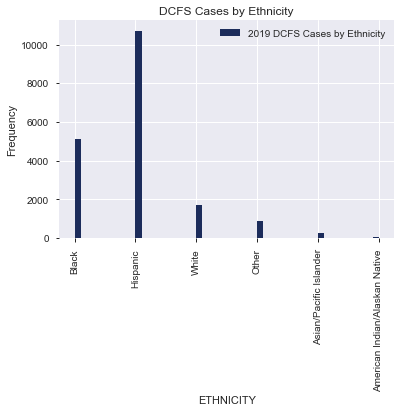

In [239]:
legend = ['2019 DCFS Cases by Ethnicity']

ETHNICITY = df['ETHNICITY']
plt.hist([ETHNICITY], color=['#1C2C5B'],bins=50)
plt.xlabel("ETHNICITY")
plt.ylabel("Frequency")
plt.legend(legend)
plt.xticks(rotation='vertical') #range(0, 7, 
plt.title('DCFS Cases by Ethnicity')
plt.show()

**Prepping for Machine Learning**


In [ ]:
PREPPING FOR MACHINE LEARNING
#Convert GENDER from string to integer
def Gender(x):
    if x == 'Female':
        return 0
    if x == 'Male':
        return 1
    if x == 'Other':
        return 2
    
X['Gender'] = df['GENDER'].apply(Gender)
X.head()

In [ ]:
X = df_cl['Age_Int'] = df['AGE_RANGE'].apply(Age_Int)
X.head()
X.to_csv('DCFS_ML.csv', index=False)